# Unsupervised learning (nenadgledano učenje)

In [13]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [14]:
from IPython.display import display_html
def showReports(dfs,titles):
    htmls = []
    for df, title in zip(dfs, titles):
        html = f"<h4>{title}</h4>" + df.to_html(index=False)
        htmls.append(html)

    display_html(''.join(
        f'<div style="display:inline-block; vertical-align:top;text-align:center; padding:6px;">{html}</div>'
        for html in htmls
    ), raw=True)

In [15]:
df = pd.read_csv("digital_literacy_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   int64  
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 8   Internet_Usage_Score                          1000 non-null   int64  
 9   Mobile_Literacy_Score                         1000 non-null   in

In [16]:
df.drop_duplicates(keep='first',inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       788 non-null    object 
 1   Age                                           788 non-null    int64  
 2   Gender                                        788 non-null    object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             788 non-null    object 
 5   Household_Income                              788 non-null    object 
 6   Location_Type                                 788 non-null    object 
 7   Basic_Computer_Knowledge_Score                788 non-null    int64  
 8   Internet_Usage_Score                          788 non-null    int64  
 9   Mobile_Literacy_Score                         788 non-null    int64  


In [17]:
df.drop(columns=['User_ID','Overall_Literacy_Score'], inplace=True)

In [18]:
label_mappings = {}

encoding_dfs={}

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    encoding_dfs[col] = pd.DataFrame(
        list(label_mappings[col].items()),
        columns=[f"{col}_original", f"{col}_encoded"]
    )


In [19]:
showReports(encoding_dfs.values(), encoding_dfs.keys())

Gender_original,Gender_encoded
Female,0
Male,1
Other,2
Education_Level_original,Education_Level_encoded
High School,0
Primary,1
Secondary,2
Employment_Status_original,Employment_Status_encoded
Farmer,0
Other,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           788 non-null    int64  
 1   Gender                                        788 non-null    int32  
 2   Education_Level                               788 non-null    int32  
 3   Employment_Status                             788 non-null    int32  
 4   Household_Income                              788 non-null    int32  
 5   Location_Type                                 788 non-null    int32  
 6   Basic_Computer_Knowledge_Score                788 non-null    int64  
 7   Internet_Usage_Score                          788 non-null    int64  
 8   Mobile_Literacy_Score                         788 non-null    int64  
 9   Post_Training_Basic_Computer_Knowledge_Score  788 non-null    int64  


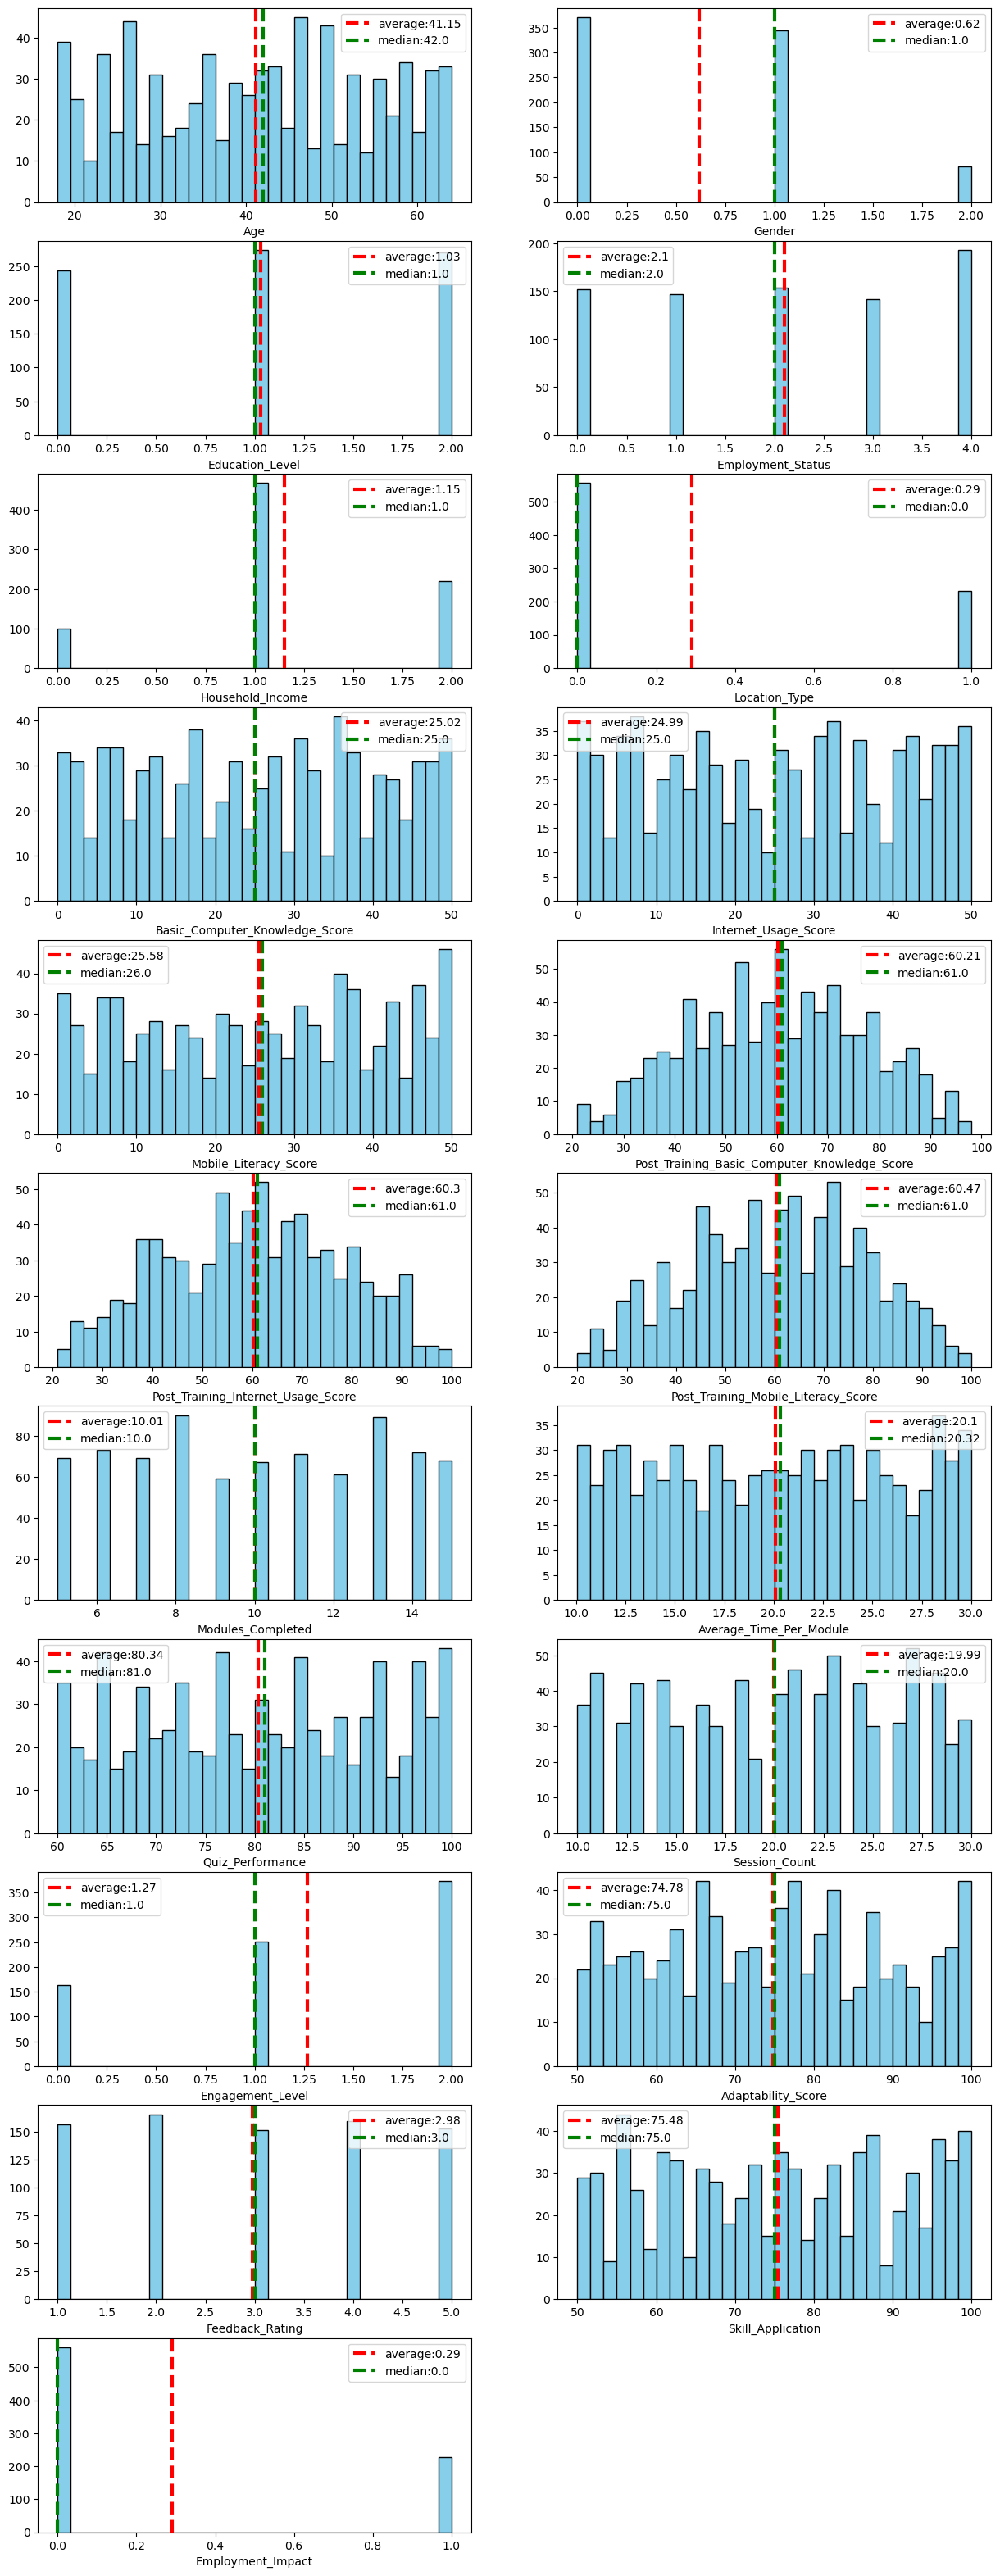

In [21]:
plt.figure(figsize=(15,40))
for ind,col in enumerate(df.columns):
    plt.subplot(11,2,ind+1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.legend([f'average:{np.round(df[col].mean(),2)}',f'median:{np.round(df[col].median(),2)}'])
plt.show()

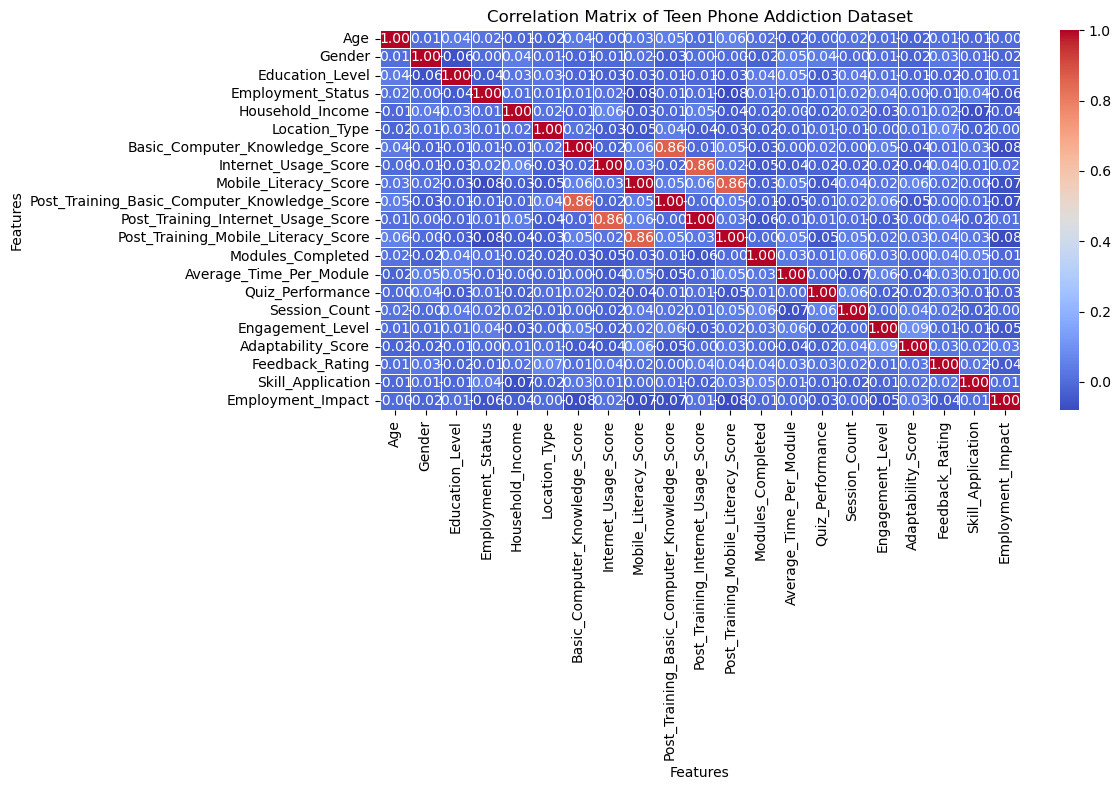

In [22]:
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## Opis karakteristika

| Karakteristika | Opis
| -------- | ------- |
| Age | Godina starosti osobe |
| Gender | Pol osobe |
| Education_Level | Nivo obrazovanja |
| Employment_status | Status zaposlenja |
| Household_Income  | Prihodi domacinstva |
| Location_Type  | Tip lokacije   |
| Basic_Computer_Knowledge_Score |  Osnovno znanje rada na racunaru |
| Internet_Usage_Score |  Rezultati koriscenja interneta   |
| Mobile_Literacy_Score | Rezultati koriscenja mobilnog  |
| Post_Training_Basic_Computer_Knowledge_Score | Znanje na racunaru posle obuke   |
| Post_Training_Internet_Usage_Score  | Znanje koriscenja interneta nakon obuke  |
| Post_Training_Mobile_Literacy_Score |  Znanje koriscenja mobilnog nakon obuke  |
| Modules_Completed  |  Zavrseni moduli   |
| Average_Time_Per_Module   | Prosecno vreme po modulu |
| Quiz_Performance  | Rezultati kviza   |
| Session_Count | Broj sesija |
| Engagement_Level  |   Nivo angazovanja  |
| Adaptability_Score | Rezultati prilagodljivosti   |
| Feedback_Rating   | Nivo povratne informacije|
| Skill_Application |  Primena vestina   |
| Employment_Impact |  Uticaj zaposljenja  |

In [23]:
## Opis karakteristika

| Karakteristika | Opis
| -------- | ------- |
| Age | Godina starosti osobe |
| Gender | Pol osobe |
| School grade | Razred škole |
| Daily_Usage_Hours | Dnevna upotreba telefona |
| Sleep_Hours | Broj sati sna |
| Academic_Performance  | Akademski rezultat ili GPA   |
| Social_Interactions |  Društvena interakcija na skali od 1 do 10 |
| Exercise_Hours |  Broj sati fizičke aktivnosti tokom nedelje   |
| Anxiety_Level | Nivo anksioznosti na skali od 1 do 10   |
| Depression_Level | Nivo depresije na skali od 1 do 10   |
| Self_Esteem | Nivo samopouzdanja na skali od 1 do 10   |
| Parental_Control |  Roditeljska kontrola nad osobom  |
| Screen_Time_Before_Bed |  Broj stai na telefonu pred spavanje   |
| Phone_Checks_Per_Day   | Dnevni broj provera telefona |
| Apps_Used_Daily | Broj korišćenih aplikacija na dnevnom nivou    |
| Time_on_Social_Media (h) | Prosečno dnevno vreme provedeno na društvenim mrežama |
| Time_on_Gaming (h)  |   Dnevno vreme igranja igrica  |
| Time_on_Education (h) | Dnevno vreme učenja   |
| Phone_Usage_Purpose   | Primarna svrha korišćenja telefona (npr. društvene mreže, igre, obrazovanje, itd.)|
| Family_Communication |  Nivo komunikacije sa roditeljima na skali od 1 do 10   |
| Weekend_Usage_Hours |  Broj sati tokom vikenda provedenih na telefonu  |

SyntaxError: invalid syntax (999467017.py, line 3)

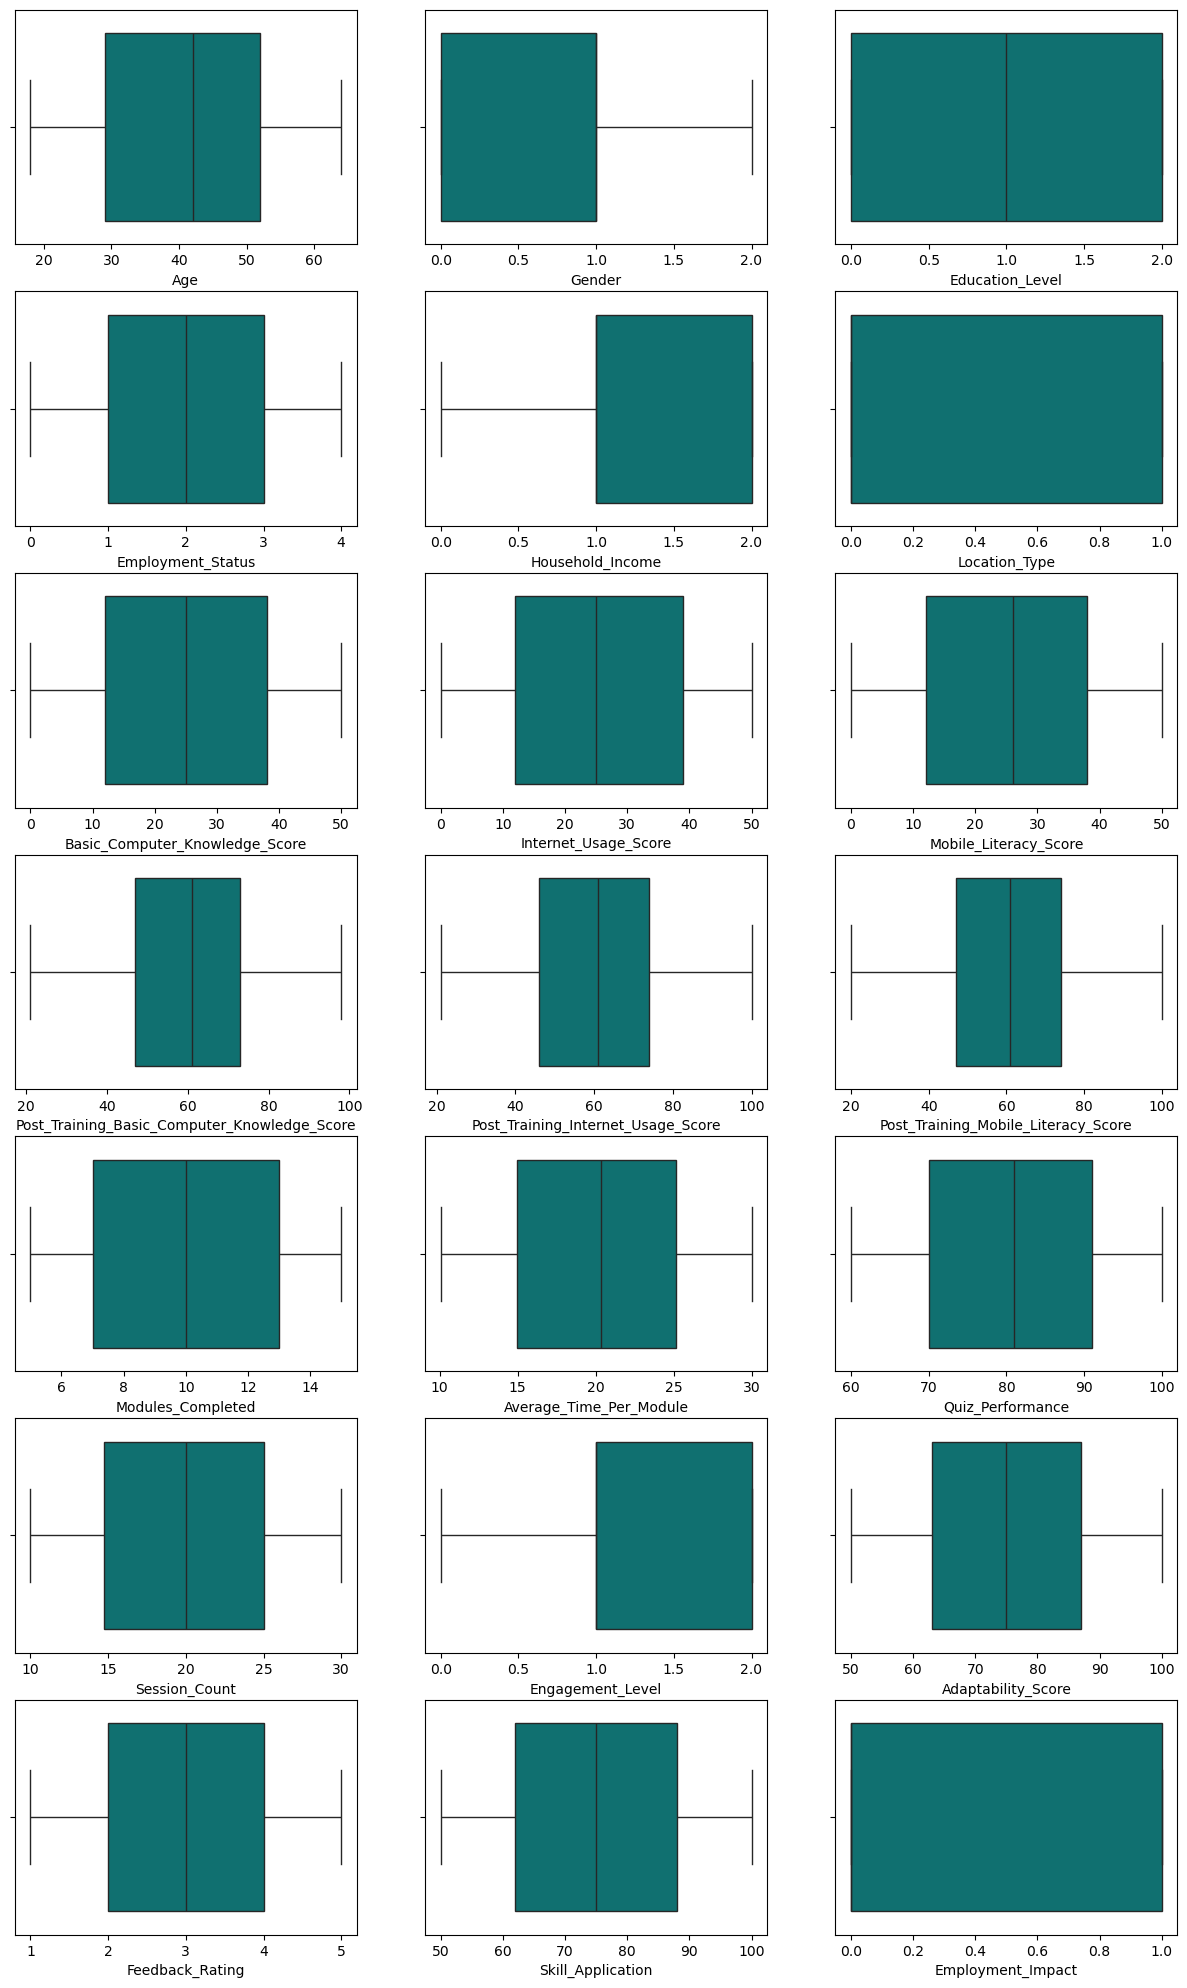

In [ ]:
fig = plt.figure(figsize=(15,25))
for i, col in enumerate(df.columns):
  plt.subplot(7,3,i+1)
  seaborn.boxplot(x = df[col], color='teal')
  plt.xlabel(col)

## K-Means

tets


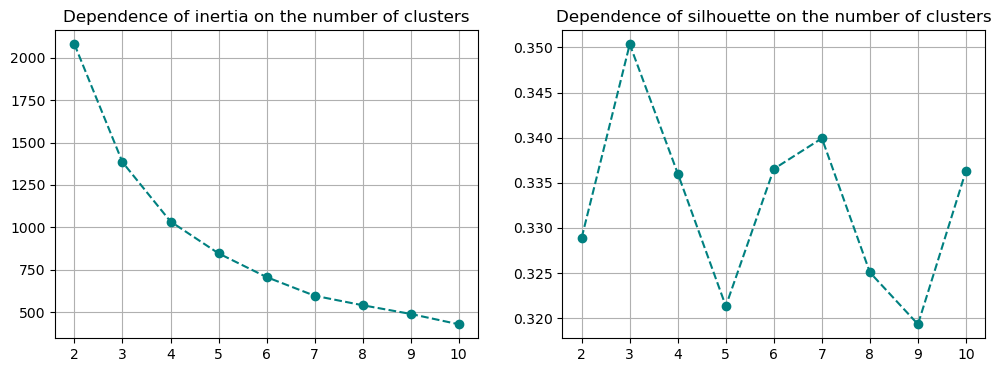

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
cols = ['Cluster',"Cluster_Name"]
if all(col in df.columns for col in cols): 
    data=df.drop(cols, axis=1)
    print("tets")
else:
    print("probica")
    data = df.copy()

scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result = pca.fit_transform(scaled_data)

inertia = []
siluette = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)
    if len(set(kmeans.labels_)) > 1:
        siluette.append(silhouette_score(pca_result, kmeans.labels_))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of inertia on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of silhouette on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.show()


Na osnovu grafika inercije i zavisnosli vrednosti siluete možemo zaključiti da je optimalan broj klastera 3. Na grafiku inercije se "lakat" uočava kod 3, odnosno 4 klastera, ali se kod vrednosti siluete ova nedoumica razjašnjuje jer je maksimalna vrednost siluete kod klasifikacije u 3 klastera.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=18)
df['Cluster'] = kmeans.fit_predict(pca_result)

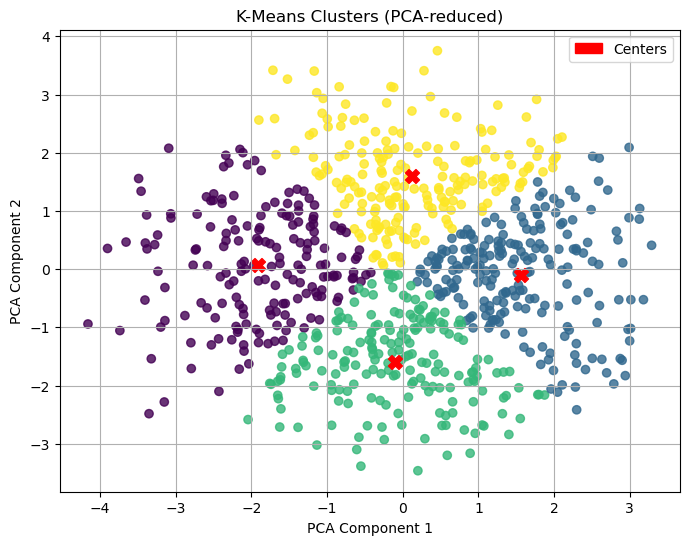

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1],
    c=df['Cluster'], cmap='viridis', alpha=0.8
)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centers')

legend_handles = []
legend_handles.append(mpatches.Patch(color='red', label='Centers'))

plt.legend(handles=legend_handles, loc='upper right')
plt.title('K-Means Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

Parametri u skupu podataka koje su imale uticaj na klasifikaciju jesu 'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score' i njene vrednosti nakon treniranja korisnika 'Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score', 'Post_Training_Mobile_Literacy_Score'.

In [ ]:
cluster_profile = df.groupby('Cluster')[
    [
        "Cluster",
        'Basic_Computer_Knowledge_Score',
        'Internet_Usage_Score',
        'Mobile_Literacy_Score',
    ]
].mean().round(2)

showReports(
    dfs=[cluster_profile],
    titles=["Cluster Profile"]
)

Cluster,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score
0.0,23.25,25.49,24.53
1.0,26.56,23.86,25.08
2.0,22.82,25.12,22.52
3.0,25.46,25.25,26.72


Davanje imena klasterima radi lakše analize

In [ ]:
cluster_names = {
    2: "Low Literacy",
    1: "High Literacy",
    0: "Medium Literacy"
}
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

mapping_df = pd.DataFrame(
    list(cluster_names.items()),
    columns=["Cluster Number", "Cluster Name"]
)

showReports(
    dfs=[mapping_df],
    titles=["Cluster Mapping"]
)

Cluster Number,Cluster Name
2,Low Literacy
1,High Literacy
0,Medium Literacy


### Features with high correlation levels

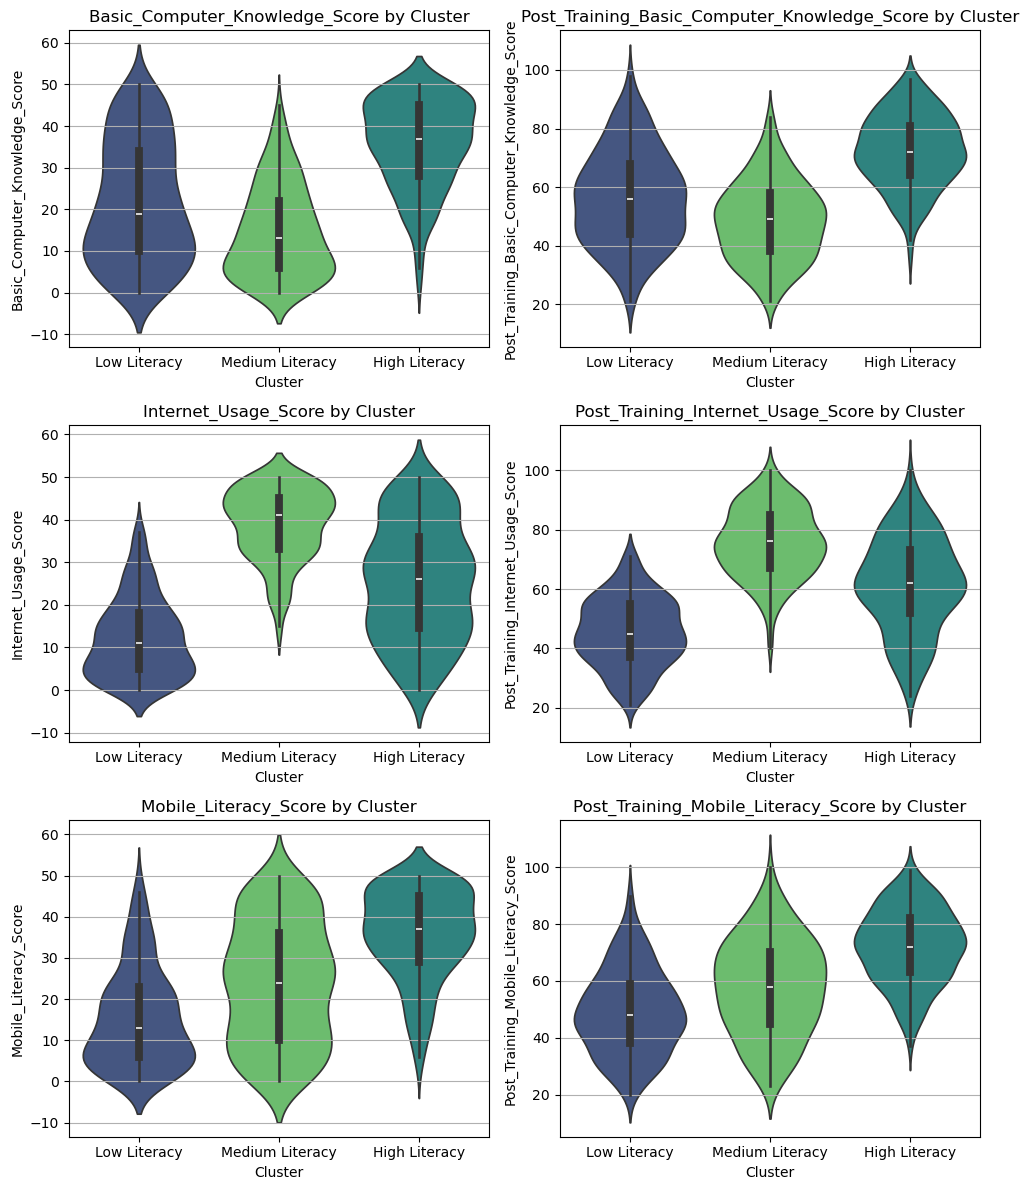

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    'Basic_Computer_Knowledge_Score',
    'Post_Training_Basic_Computer_Knowledge_Score',
    'Internet_Usage_Score',
    'Post_Training_Internet_Usage_Score',
    'Mobile_Literacy_Score',
    'Post_Training_Mobile_Literacy_Score'
]

order = ["Low Literacy", "Medium Literacy", "High Literacy"]

n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(10, 4 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(
        x='Cluster_Name',
        y=feature,
        hue='Cluster_Name',
        data=df,
        palette='viridis',
        legend=False,
        order=order
    )
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Features with low correlation levels

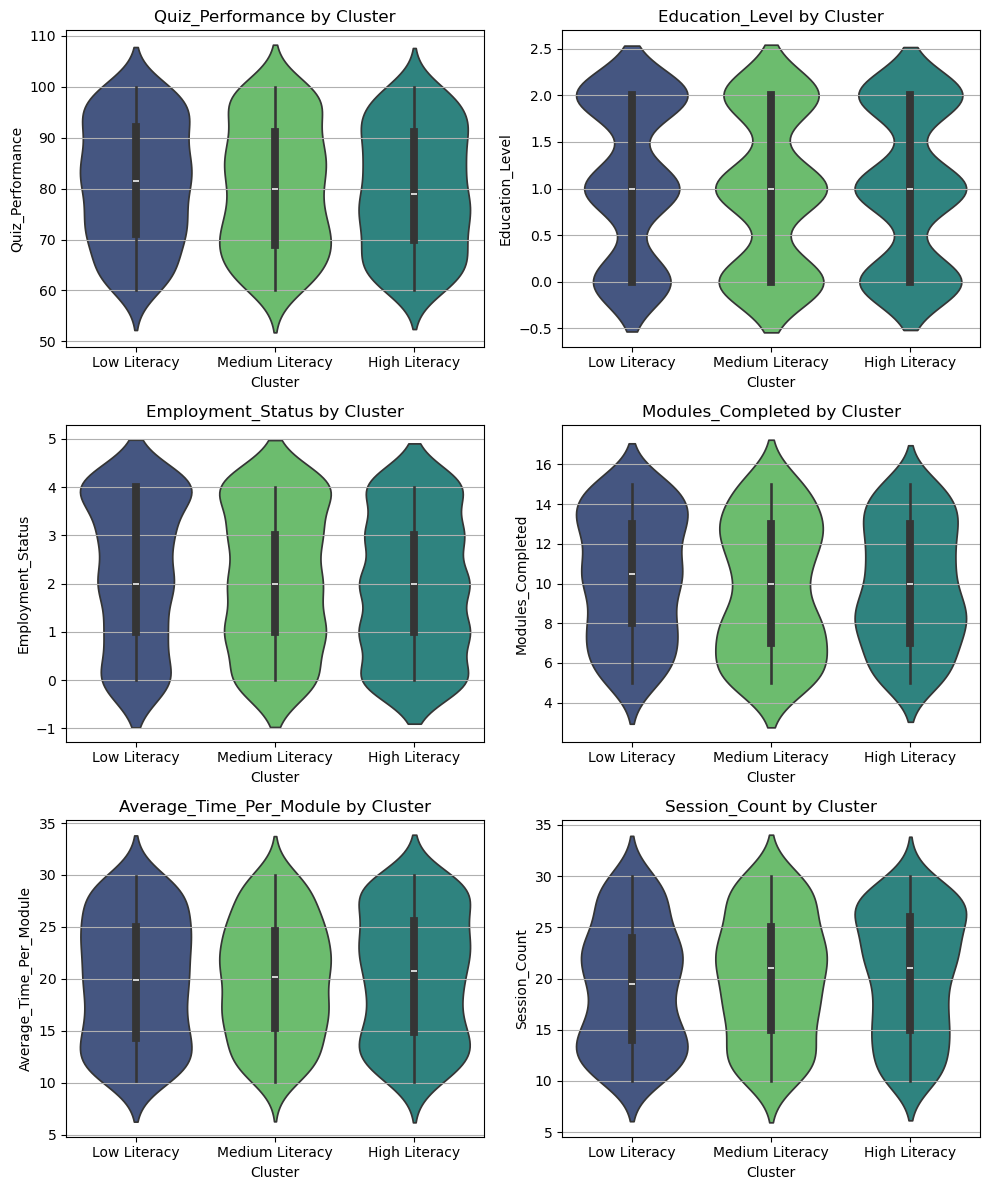

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    'Quiz_Performance',
    'Education_Level',
    'Employment_Status',
    'Modules_Completed',
    'Average_Time_Per_Module',
    'Session_Count'
]

order = ["Low Literacy", "Medium Literacy", "High Literacy"]

n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(10, 4 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(
        x='Cluster_Name',
        y=feature,
        hue='Cluster_Name',
        data=df,
        palette='viridis',
        legend=False,
        order=order
    )
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

## DBSCAN


StandardScaler DBSCAN cluster counts:
-1     98
 0    630
 1      8
 2     10
 3     11
 4     17
 5      9
 6      5
Name: count, dtype: int64

MinMaxScaler DBSCAN cluster counts:
0     67
1    160
2    396
3    165
Name: count, dtype: int64


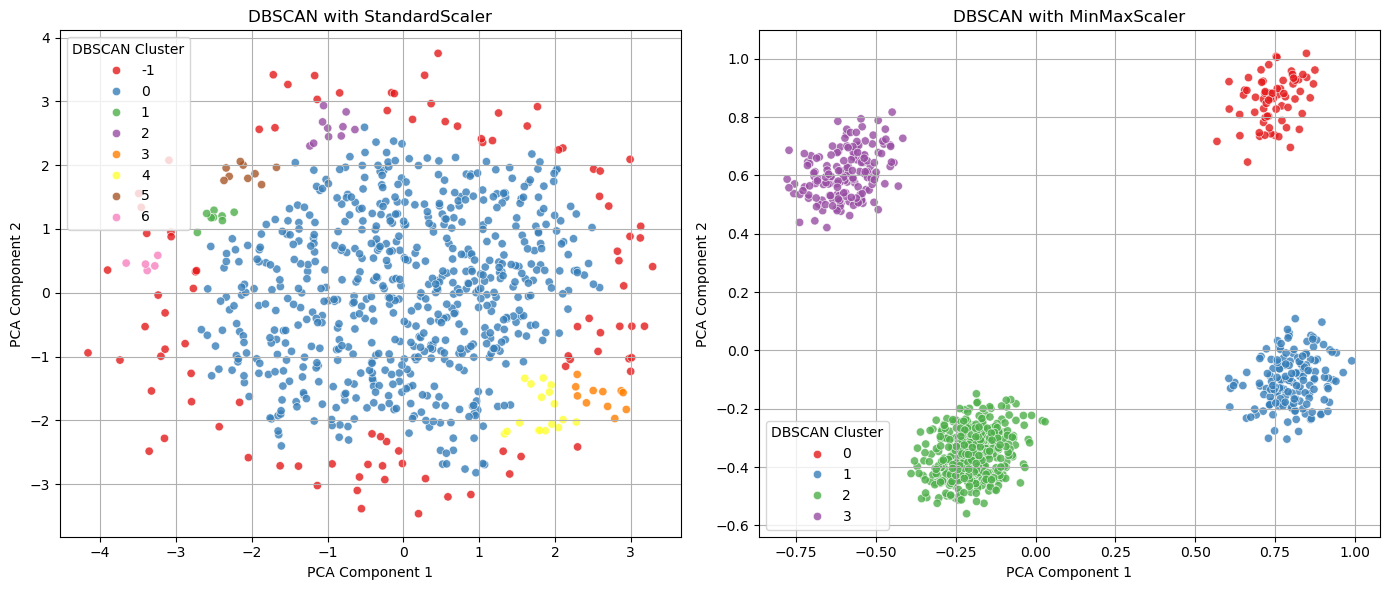

In [ ]:
# Comparison between StandardScaler and MinMaxScaler for DBSCAN clustering

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan_labels = dbscan.fit_predict(pca_result)
    results[scaler_name] = {
        "labels": dbscan_labels,
        "pca_result": pca_result
    }
    print(f"\n{scaler_name} DBSCAN cluster counts:")
    print(pd.Series(dbscan_labels).value_counts().sort_index())

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, (scaler_name, res) in zip(axes, results.items()):
    palette = sns.color_palette("Set1", n_colors=len(set(res["labels"])))
    sns.scatterplot(
        x=res["pca_result"][:, 0], y=res["pca_result"][:, 1],
        hue=res["labels"],
        palette=palette,
        legend='full',
        alpha=0.8,
        ax=ax
    )
    ax.set_title(f"DBSCAN with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="DBSCAN Cluster")
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(pca_result)

In [ ]:
cluster_profile = df.groupby('Cluster')[
    [
        "Cluster",
        'Basic_Computer_Knowledge_Score',
        'Internet_Usage_Score',
        'Mobile_Literacy_Score',
    ]
].mean().round(2)

showReports(
    dfs=[cluster_profile],
    titles=["Cluster Profile"]
)

Cluster,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score
0.0,22.82,25.12,22.52
1.0,23.25,25.49,24.53
2.0,25.46,25.25,26.72
3.0,26.56,23.86,25.08


In [ ]:
cluster_names = {
    0: "Low Literacy",
    1: "Medium Literacy",
    3: "High Literacy",
    2: "Very High Literacy"
}
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

### Features with high correlation levels

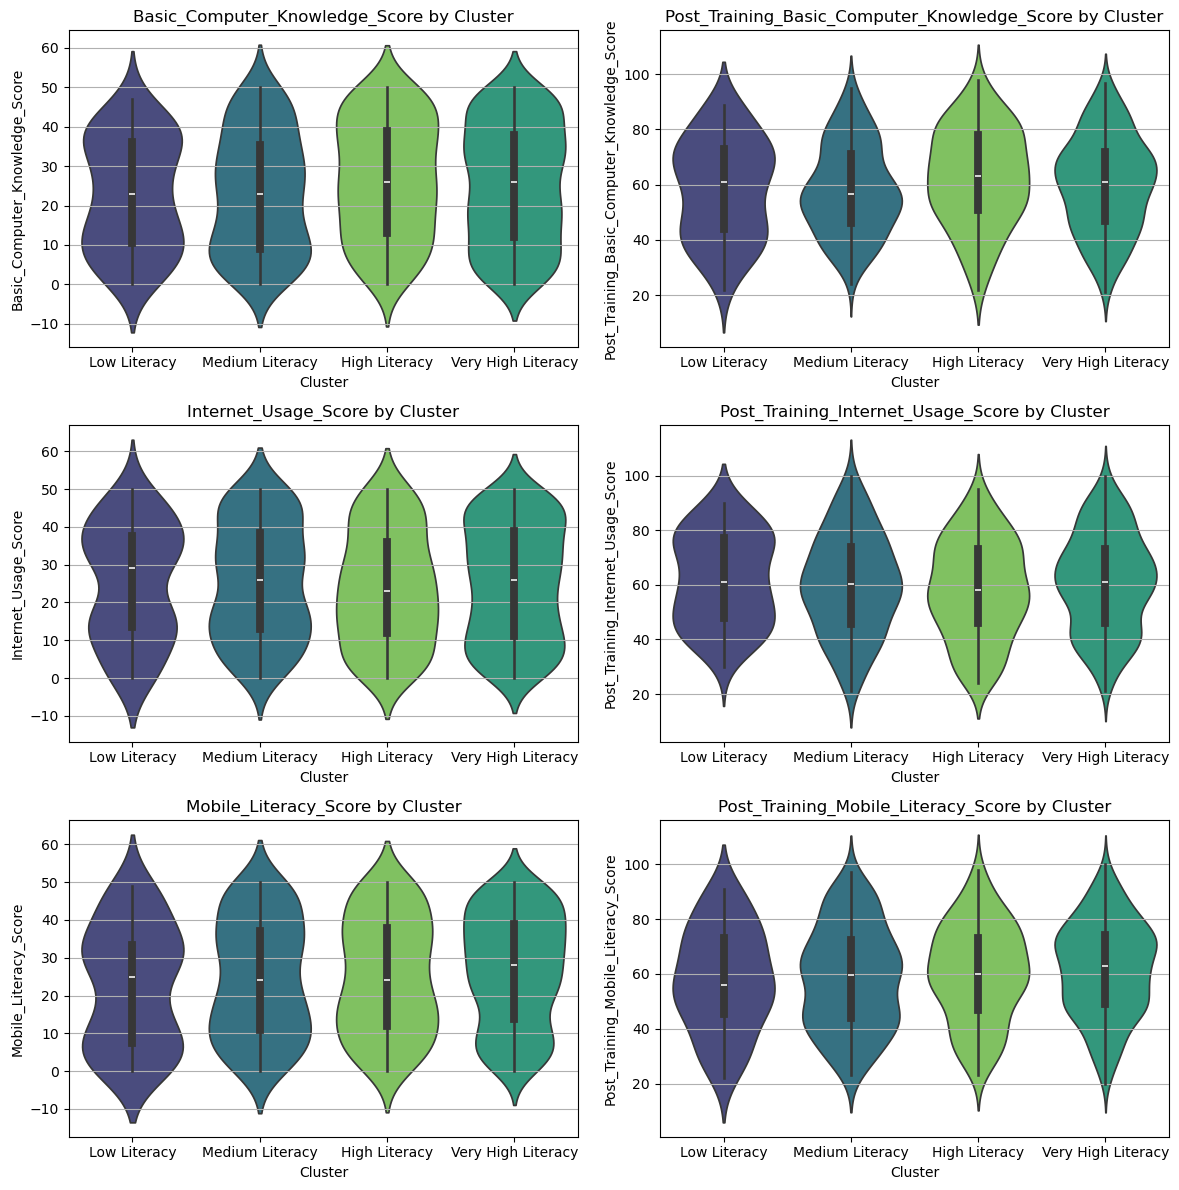

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    'Basic_Computer_Knowledge_Score',
    'Post_Training_Basic_Computer_Knowledge_Score',
    'Internet_Usage_Score',
    'Post_Training_Internet_Usage_Score',
    'Mobile_Literacy_Score',
    'Post_Training_Mobile_Literacy_Score'
]

order = ["Low Literacy", "Medium Literacy", "High Literacy","Very High Literacy"]

n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(12, 4 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(
        x='Cluster_Name',
        y=feature,
        hue='Cluster_Name',
        data=df,
        palette='viridis',
        legend=False,
        order=order
    )
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Features with low correlation levels

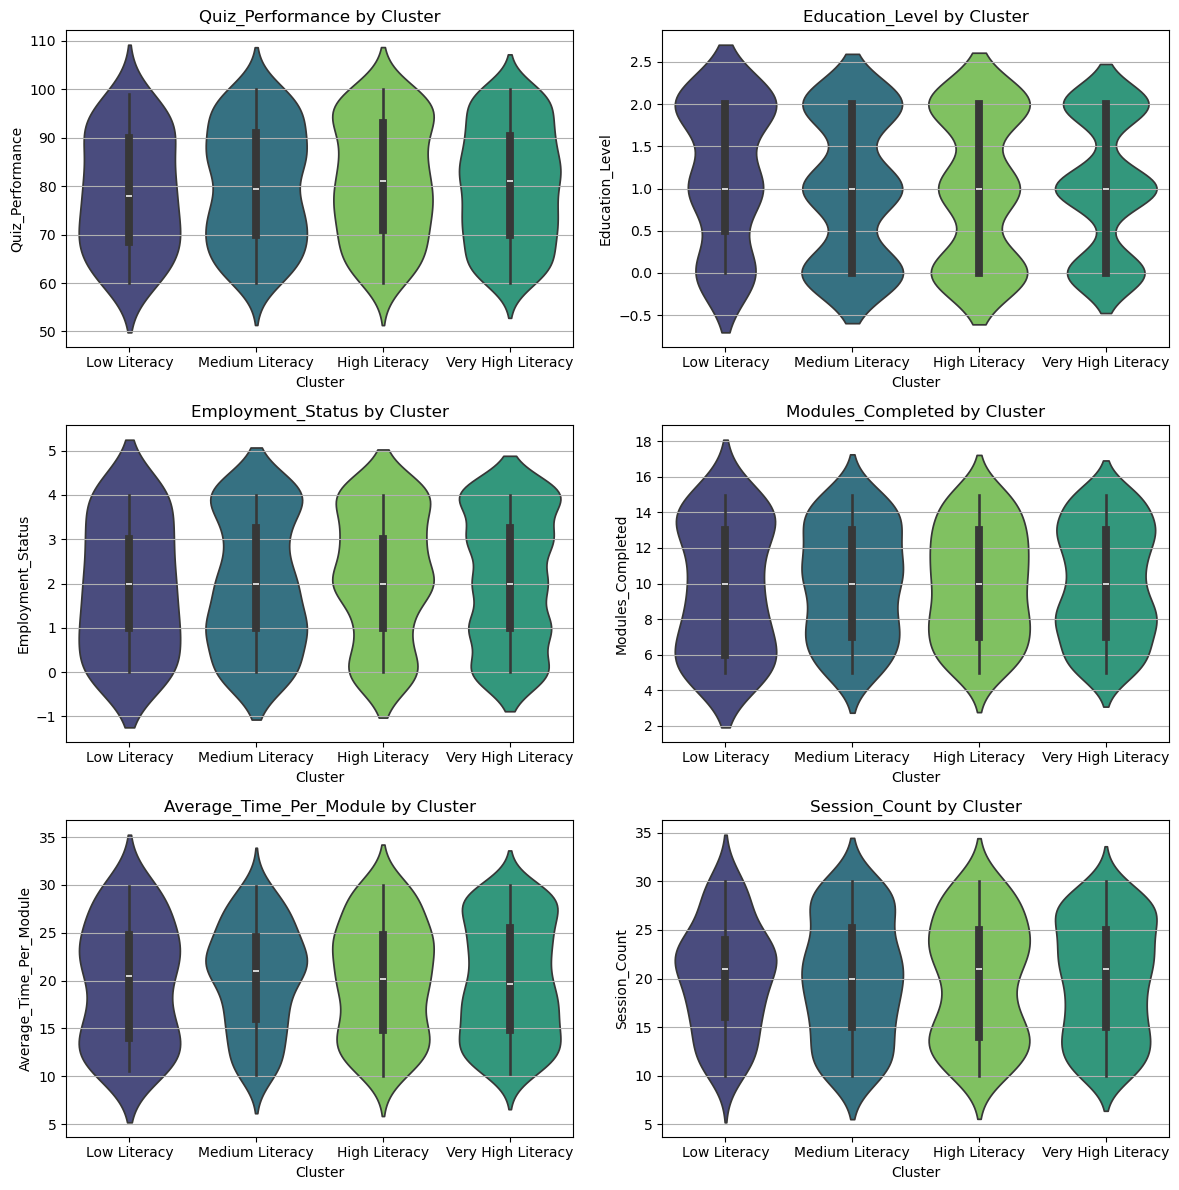

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    'Quiz_Performance',
    'Education_Level',
    'Employment_Status',
    'Modules_Completed',
    'Average_Time_Per_Module',
    'Session_Count'
]

n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(12, 4 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(
        x='Cluster_Name',
        y=feature,
        hue='Cluster_Name',
        data=df,
        palette='viridis',
        legend=False,
        order=order
    )
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()